# Food Recipes using Gemma (Google Generative AI)

In [9]:
# Load Images
import PIL.Image

# API Key
from dotenv import load_dotenv
import os

# LLM
import google.generativeai as genai
from IPython.display import Markdown, clear_output, display


# Load variables from .env
load_dotenv()

# Access the API key
API_KEY = os.getenv('API_KEY')

In [22]:
prompt = '''Please provide a detailed recipe including the ingredients and step-by-step instructions on how to prepare the dish. If the image is not of a food item, please return an error message indicating that the image is not recognized as food, dont repeat Ingredients.

Please follow this format:

1. **Dish Name**: [Name of the dish]
2. **Ingredients**:
   - [Ingredient 1]
   - [Ingredient 2]
   - [Ingredient 3]
   - ...

3. **Instructions**:
   1. [Step 1]
   2. [Step 2]
   3. [Step 3]
   4. ...

If the image is not of a food item, respond with:
"Error: The image is not recognized as food."
'''

### Example of a food image

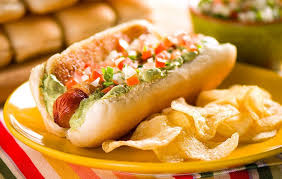

In [10]:
img = PIL.Image.open('./images/hot_dog.jpeg')

img

In [23]:
genai.configure(api_key=API_KEY)

model = genai.GenerativeModel(model_name='gemini-pro-vision')
response = model.generate_content([prompt, img], stream=False)

buffer = []
for chunk in response:
    for part in chunk.parts:
        buffer.append(part.text)
    clear_output()
    display(Markdown(''.join(buffer)))

 1. **Dish Name**: Hot Dog
2. **Ingredients**:
   - Hot dog bun
   - Hot dog sausage
   - Ketchup
   - Mustard
   - Onion
   - Tomato
   - Pickle
   - Relish
   - Cheese (optional)
   - Chili (optional)
3. **Instructions**:
   1. Grill the hot dog sausage until cooked through.
   2. Place the hot dog sausage in the hot dog bun.
   3. Add ketchup, mustard, onion, tomato, pickle, relish, cheese, and chili (if desired).
   4. Serve immediately.

### Example of a not food image

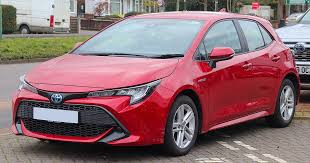

In [24]:
img = PIL.Image.open('./images/car_image.jpeg')

img

In [26]:
genai.configure(api_key=API_KEY)

model = genai.GenerativeModel(model_name='gemini-pro-vision')
response = model.generate_content([prompt, img], stream=False)

buffer = []
for chunk in response:
    for part in chunk.parts:
        buffer.append(part.text)
    clear_output()
    display(Markdown(''.join(buffer)))

 Error: The image is not recognized as food.